In [3]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import imageio
import scipy.misc
from PIL import Image
from skimage.transform import resize
from skimage import data
from my_dnn_util import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 1. It's a cat picture.


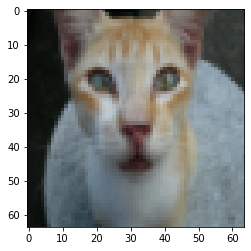

In [6]:
# Example of a picture
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [7]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [8]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [9]:
### CONSTANTS ###
input_size=train_x.shape[0]
layers_dims = [input_size, 20, 7, 5, 1] #  4-layer model

In [10]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False, keep_prob = 1.0):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if item, 1 if non-item), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(1)
    costs = []                         # keep track of cost
  
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches,D_list =  L_model_forward(X,parameters,keep_prob)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL,Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches, D_list, keep_prob)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.669270
Cost after iteration 200: 0.638874
Cost after iteration 300: 0.597884
Cost after iteration 400: 0.568827
Cost after iteration 500: 0.461260
Cost after iteration 600: 0.508484
Cost after iteration 700: 0.327596
Cost after iteration 800: 0.310398
Cost after iteration 900: 0.248831
Cost after iteration 1000: 0.207309
Cost after iteration 1100: 0.140485
Cost after iteration 1200: 0.115670
Cost after iteration 1300: 0.099260
Cost after iteration 1400: 0.085845
Cost after iteration 1500: 0.074975
Cost after iteration 1600: 0.067809
Cost after iteration 1700: 0.058402
Cost after iteration 1800: 0.052054
Cost after iteration 1900: 0.047680
Cost after iteration 2000: 0.042259
Cost after iteration 2100: 0.037797
Cost after iteration 2200: 0.034730
Cost after iteration 2300: 0.031391
Cost after iteration 2400: 0.028788


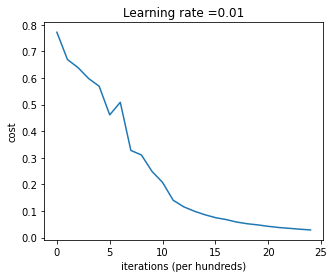

In [11]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True, keep_prob = 1.0)

In [12]:
pred_train = predict(train_x, train_y, parameters, keep_prob = 1.0)

Accuracy: 0.9999999999999998


In [13]:
pred_test = predict(test_x, test_y, parameters, keep_prob = 1.0)

Accuracy: 0.8


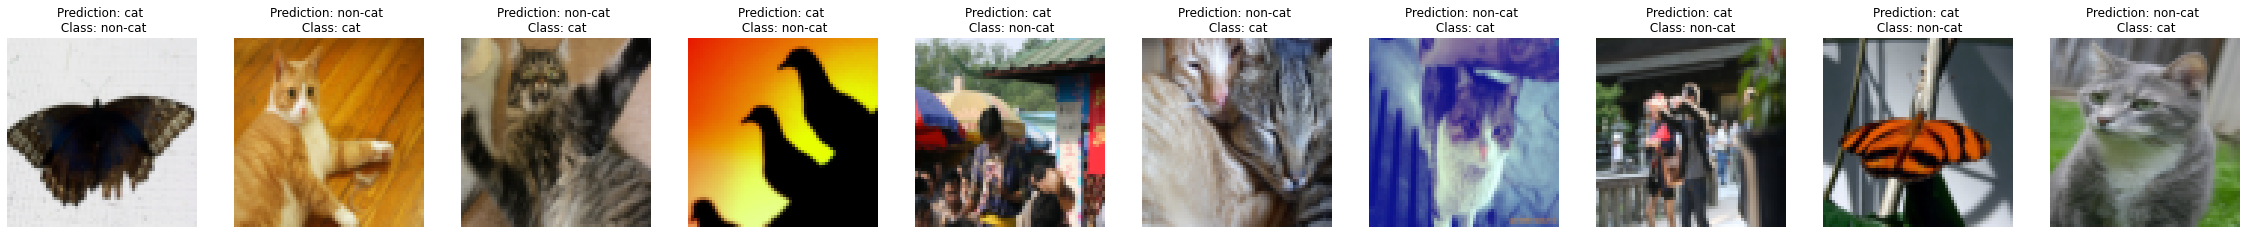

In [14]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

(425, 417, 3)
Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


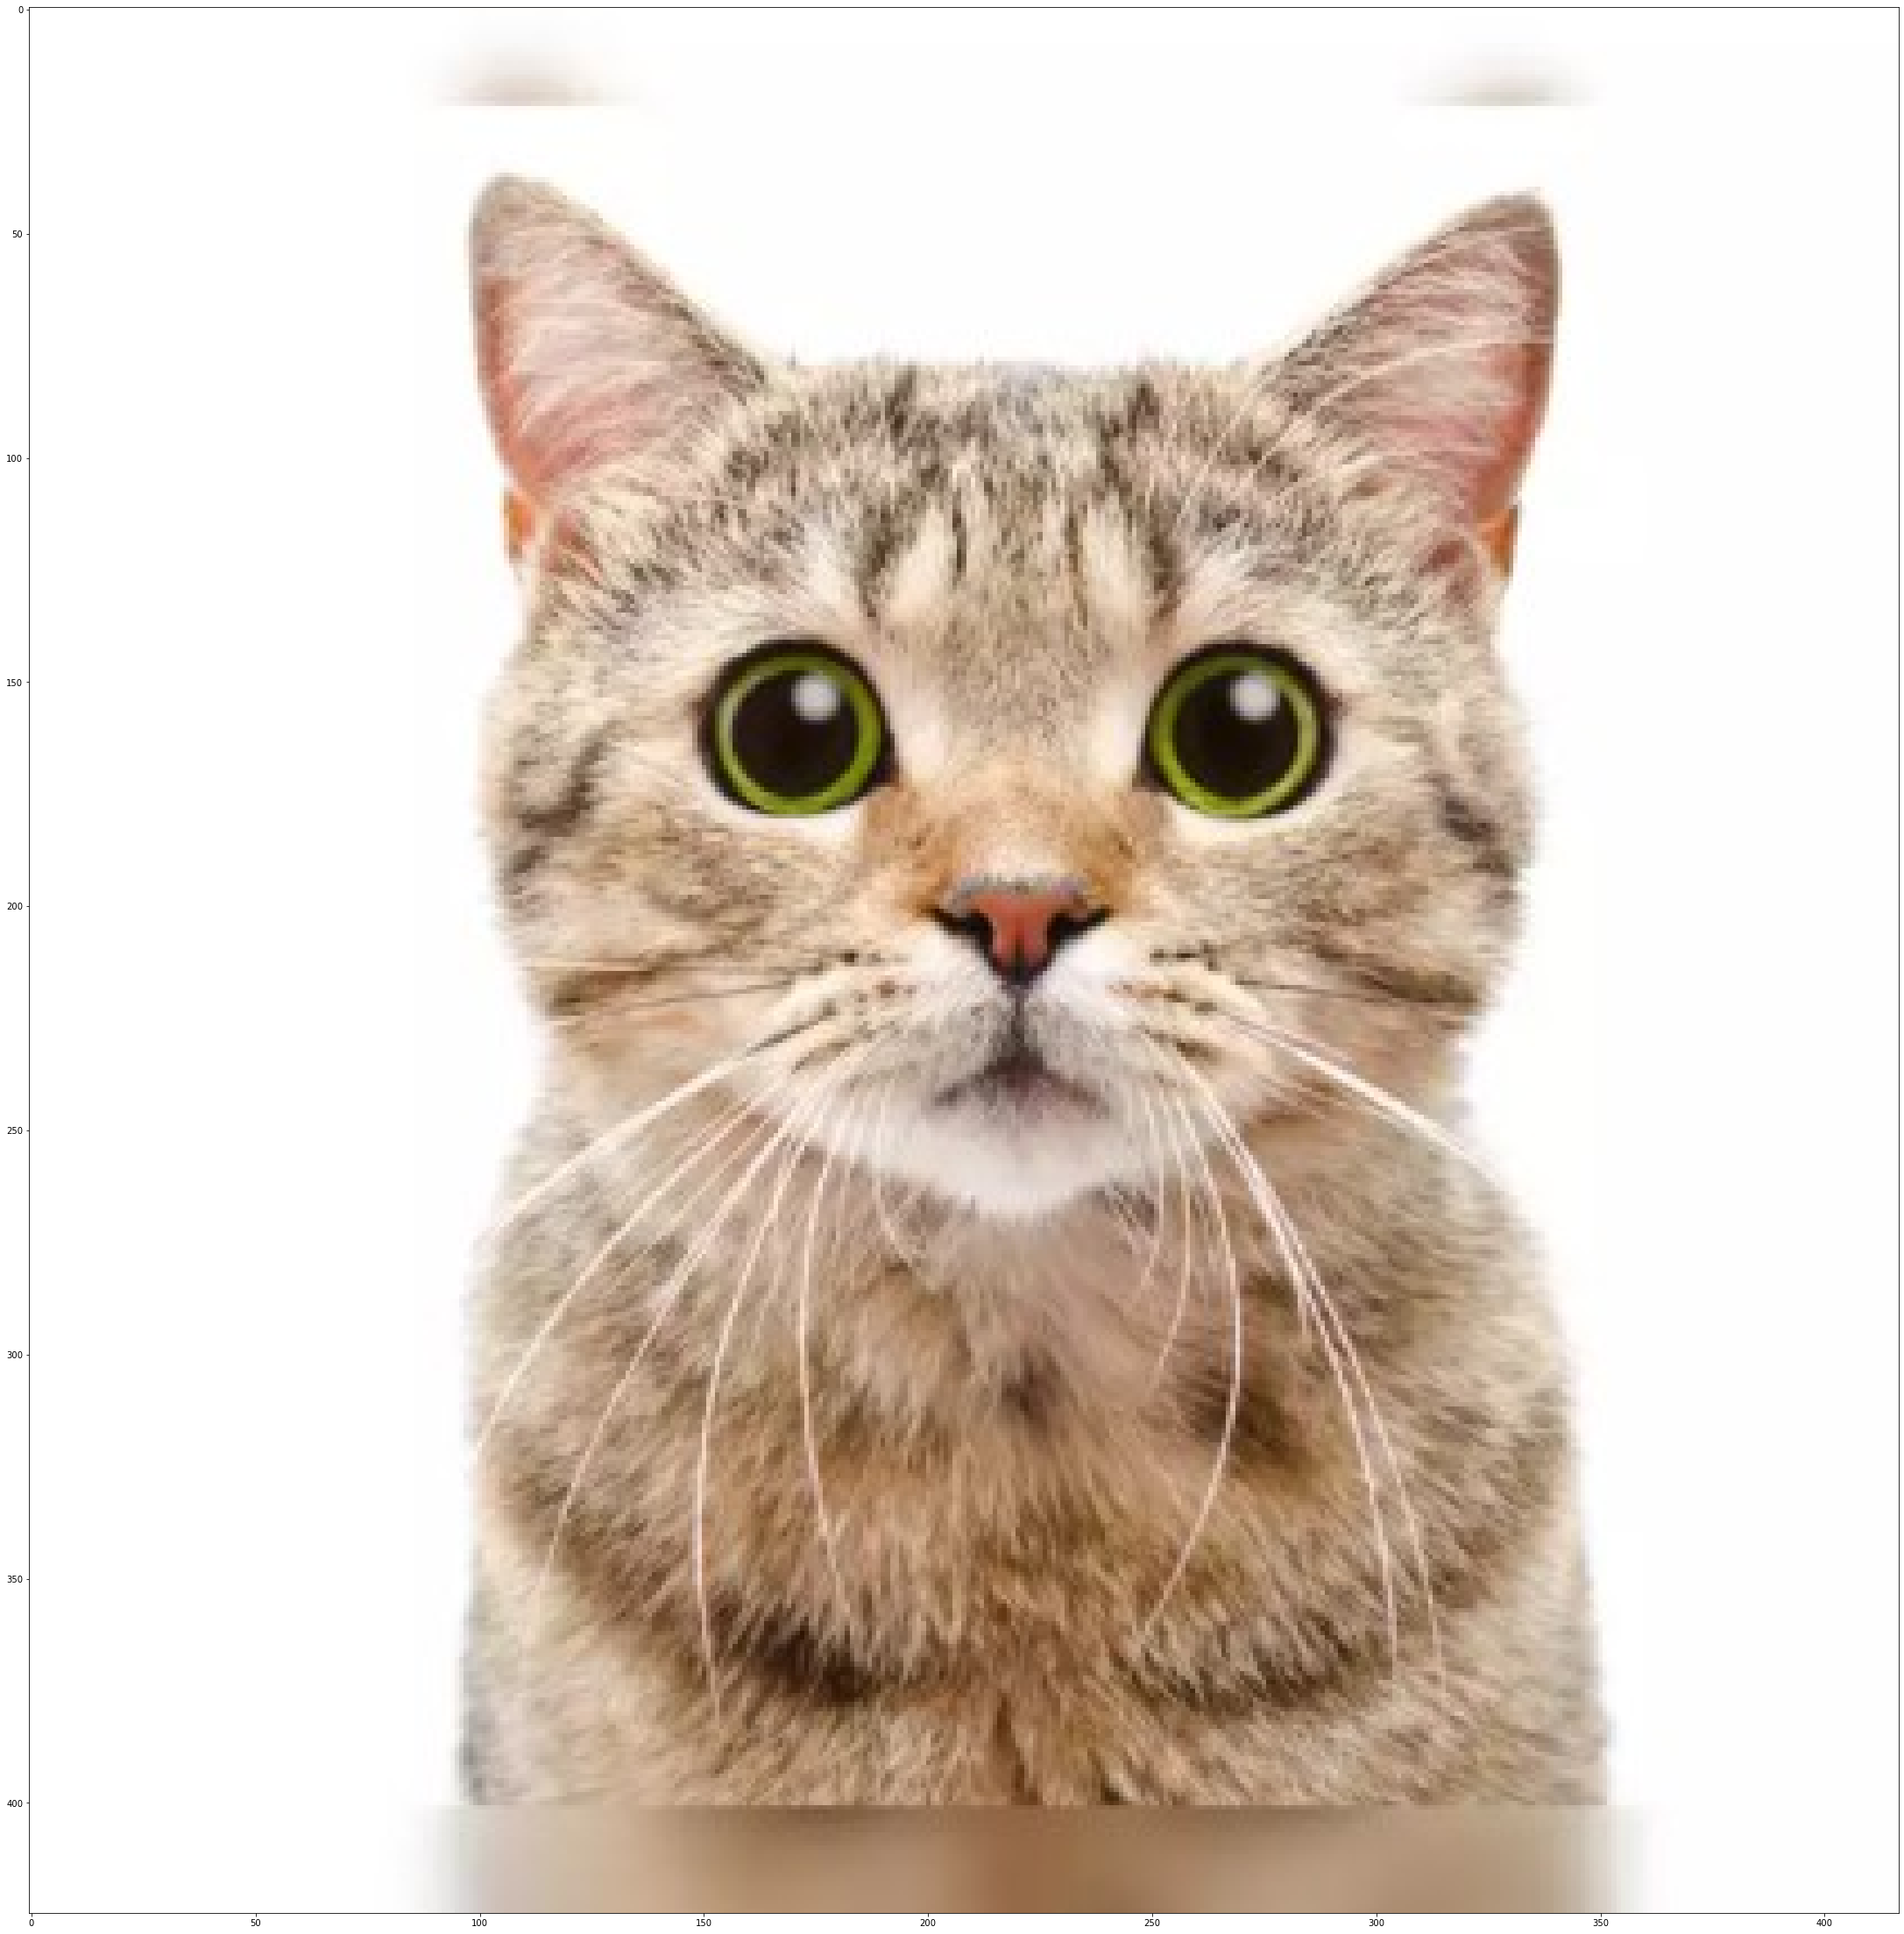

In [15]:
## START CODE HERE ##
my_image = "img3.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> item, 0 -> non-item)
## END CODE HERE ##

fname = "datasets/" + my_image
#image = np.array(scipy.misc.imread(fname))
im = np.array(imageio.imread(fname))
print(im.shape)
my_image=resize(im, (num_px, num_px)).reshape((num_px*num_px*3,1))
#reshape((num_px*num_px*3,1))
#print(image.shape)
#print(image)
#my_image = Image.fromarray(im).resize(num_px,num_px).reshape((num_px*num_px*3,1))
#my_image = image/255.
my_predicted_image = predict(my_image, my_label_y, parameters, keep_prob= 0.7)

plt.imshow(im)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")